In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
import time
from tqdm import tqdm

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()


# Ignore useless warnings (see SciPy issue #5998)
# import warnings
# warnings.filterwarnings(action="ignore", message="^internal gelsd")


# ...
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
# from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix


# import category_encoders as ce
# from category_encoders import BinaryEncoder

In [16]:
# Paths ...
PATH_TO_DATA_DIR = os.path.join('..', '..', 'Data')

# ...
ADASYB_DATASET_TRAIN = os.path.join(PATH_TO_DATA_DIR, 'Adasyn_train.csv')
ADASYB_DATASET_TEST = os.path.join(PATH_TO_DATA_DIR, 'Adasyn_test.csv')

NEARMISS_DATASET_TRAIN = os.path.join(PATH_TO_DATA_DIR, 'Nearmiss_train.csv')
NEARMISS_DATASET_TEST = os.path.join(PATH_TO_DATA_DIR, 'Nearmiss_test.csv')


SMOTE_TOMEK_DATASET_TRAIN = os.path.join(PATH_TO_DATA_DIR, 'SMOTETomek_train.csv')
SMOTE_TOMEK_DATASET_TEST = os.path.join(PATH_TO_DATA_DIR, 'SMOTETomek_test.csv')

PATH_TO_DATA_DIR

'..\\..\\Data'

In [4]:
classifiers = [
    LogisticRegression(),
    #KNeighborsClassifier(4),  # Take too long time at this moment
    #SVC(kernel="rbf", C=0.025, probability=True), # Take too long time at this moment
    #NuSVC(probability=True), # Take too long time at this moment
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
]

## Model Selector

In [9]:
def plot_hist(dataFrame, feature, title='Histogram'):
    sns.set(style="ticks", color_codes=True)
    sns.distplot(dataFrame[feature], color='red', kde=False, bins=5)

    plt.title(title)
    plt.xlim(-0.5, 1.5)
    plt.tight_layout();

    # plt.savefig('./imgs/barplot_price_bin.png', dpi=300);

    
def split_data_set(df_train_, df_test_):
    print(df_train_.shape)
    print(df_test_.shape)
    X_train_ = df_train_.loc[:, df_train_.columns != 'NoShow'] 
    y_train_ = df_train_[['NoShow']].values

    X_test_ = df_test_.loc[:, df_test_.columns != 'NoShow'] 
    y_test_ = df_test_[['NoShow']].values

    return X_train_, y_train_, X_test_, y_test_

class ModelSelector:
    def __init__(self, dataset):
        self.X_train, self.y_train, self.X_test, self.y_test = dataset
        #self.X_train = X_train
        #self.y_train = y_train
        #self.X_test = X_test
        #self.y_test = y_test

    def __get_processing_full_pipeline(self):
        # ...
        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])
        # ...
        categorical_transformer = None

        # ...
        return FeatureUnion(transformer_list=[
            ("num_pipeline", numeric_transformer),
#             ("cat_pipeline", categorical_transformer),
        ])


    def __get_pipline(self, classifier):
        return Pipeline(steps = [
                ('processing_full_pipeline', self.__get_processing_full_pipeline()),
                ('classifier', classifier)
            ]
        )

    def __make_plots(self, pipe):
        plot_confusion_matrix(
            pipe, 
            self.X_test,
            self.y_test,
            cmap="BuGn",
            normalize='true',
            #ax=ax6
        );
        print('='*50)

    def start(self, classifiers):
        print('===================  START  ===================')
        df_models_performence = []
        for classifier in classifiers:
            print('START ', type(classifier).__name__)
            pipe = self.__get_pipline(classifier)
            pipe.fit(self.X_train, self.y_train)
            
            # ...
            y_pred_ = pipe.predict(self.X_test)
            train_score = pipe.score(self.X_train, self.y_train)
            test_score = pipe.score(self.X_test, self.y_test)
            precision_score_ = round(precision_score(self.y_test, y_pred_), 3)
            recall_score_ = round(recall_score(self.y_test, y_pred_), 3)
            f1_score_ = round(f1_score(self.y_test, y_pred_), 3)

            # ...
            df_models_performence.append({
                'name': type(classifier).__name__,
                'train_score': train_score,
                'test_score': test_score,
                'precision_score': precision_score_,
                'recall_score': recall_score_,
                'f1_score': f1_score_,
            })
            self.__make_plots(pipe)
            print('END ', type(classifier).__name__)

        print('===================  END  ===================')
        return pd.DataFrame(df_models_performence)

## Adasyn

In [7]:
adasyn_dataset = split_data_set(
    pd.read_csv(ADASYB_DATASET_TRAIN),
    pd.read_csv(ADASYB_DATASET_TEST)
)

(123381, 43)
(34937, 43)


In [10]:
model_selector_adasyn = ModelSelector(adasyn_dataset)
model_selector_adasyn

===================  START  ===================
START  LogisticRegression


c:\worspace\python\venv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


END  LogisticRegression
START  DecisionTreeClassifier
END  DecisionTreeClassifier
START  RandomForestClassifier


c:\worspace\python\venv\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


END  RandomForestClassifier
START  AdaBoostClassifier


c:\worspace\python\venv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


END  AdaBoostClassifier
START  GradientBoostingClassifier


c:\worspace\python\venv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


END  GradientBoostingClassifier
===================  END  ===================


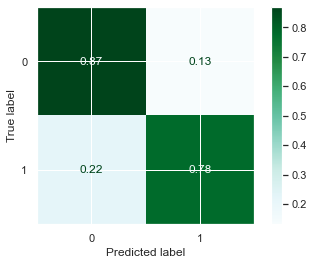

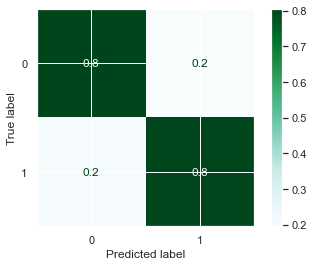

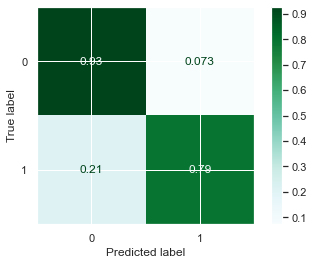

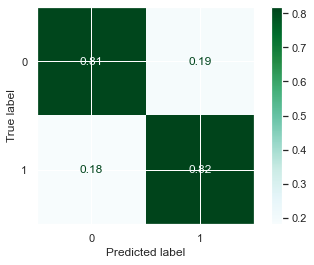

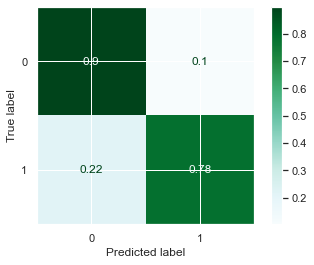

In [11]:
df_ = model_selector_adasyn.start(classifiers)

In [13]:
df_

,name,train_score,test_score,precision_score,recall_score,f1_score
0,LogisticRegression,0.821010,0.823597,0.856,0.778,0.815
1,DecisionTreeClassifier,0.998436,0.801586,0.804,0.798,0.801
2,RandomForestClassifier,0.998420,0.859032,0.916,0.791,0.849
3,AdaBoostClassifier,0.814129,0.815267,0.813,0.819,0.816
4,GradientBoostingClassifier,0.840032,0.840284,0.884,0.783,0.831


## Nearmiss

In [12]:
nearmiss_dataset = split_data_set(
    pd.read_csv(NEARMISS_DATASET_TRAIN),
    pd.read_csv(NEARMISS_DATASET_TEST)
)

(31328, 43)
(8836, 43)


===================  START  ===================
START  LogisticRegression


c:\worspace\python\venv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


END  LogisticRegression
START  DecisionTreeClassifier
END  DecisionTreeClassifier
START  RandomForestClassifier


c:\worspace\python\venv\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


END  RandomForestClassifier
START  AdaBoostClassifier


c:\worspace\python\venv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


END  AdaBoostClassifier
START  GradientBoostingClassifier


c:\worspace\python\venv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


END  GradientBoostingClassifier
===================  END  ===================


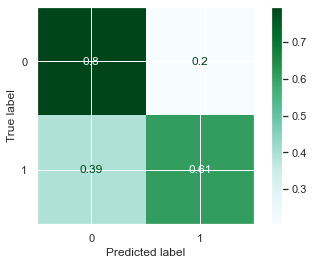

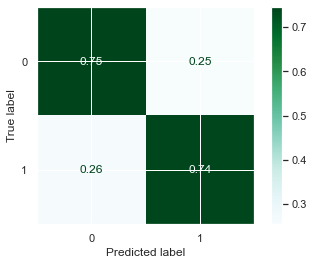

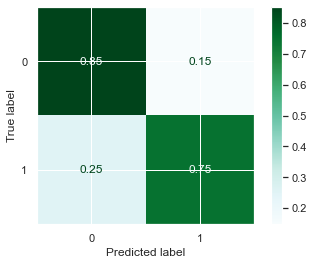

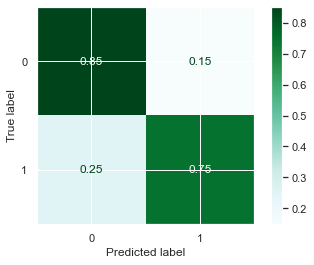

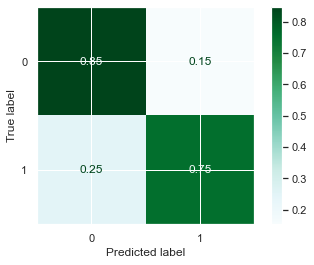

In [14]:
model_selector_nearmiss = ModelSelector(nearmiss_dataset)
df_2_ = model_selector_nearmiss.start(classifiers)

In [15]:
df_2_

,name,train_score,test_score,precision_score,recall_score,f1_score
0,LogisticRegression,0.702311,0.701675,0.748,0.608,0.671
1,DecisionTreeClassifier,0.996808,0.743436,0.744,0.741,0.743
2,RandomForestClassifier,0.996808,0.799909,0.835,0.747,0.789
3,AdaBoostClassifier,0.786102,0.799796,0.835,0.747,0.789
4,GradientBoostingClassifier,0.790379,0.799457,0.831,0.752,0.789


## SMOTETomek

In [17]:
smote_tomek_dataset = split_data_set(
    pd.read_csv(SMOTE_TOMEK_DATASET_TRAIN),
    pd.read_csv(SMOTE_TOMEK_DATASET_TEST)
)

(101432, 43)
(27032, 43)


===================  START  ===================
START  LogisticRegression


c:\worspace\python\venv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


END  LogisticRegression
START  DecisionTreeClassifier
END  DecisionTreeClassifier
START  RandomForestClassifier


c:\worspace\python\venv\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


END  RandomForestClassifier
START  AdaBoostClassifier


c:\worspace\python\venv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


END  AdaBoostClassifier
START  GradientBoostingClassifier


c:\worspace\python\venv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


END  GradientBoostingClassifier
===================  END  ===================


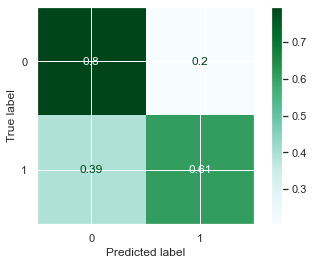

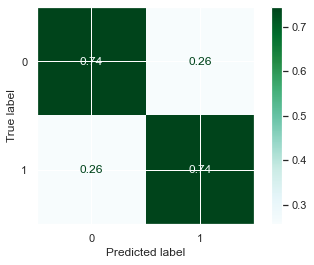

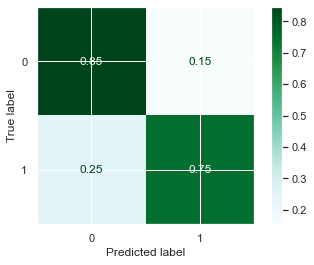

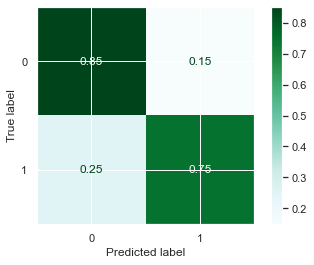

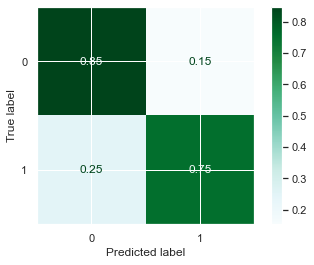

In [19]:
model_selector_smote_tomek = ModelSelector(smote_tomek_dataset)
df_3_ = model_selector_nearmiss.start(classifiers)

In [20]:
df_3_

,name,train_score,test_score,precision_score,recall_score,f1_score
0,LogisticRegression,0.702311,0.701675,0.748,0.608,0.671
1,DecisionTreeClassifier,0.996808,0.743889,0.744,0.744,0.744
2,RandomForestClassifier,0.996808,0.798325,0.830,0.751,0.788
3,AdaBoostClassifier,0.786102,0.799796,0.835,0.747,0.789
4,GradientBoostingClassifier,0.790379,0.799457,0.831,0.752,0.789


## Summary

In [26]:
print('>> Adasyn <<')
df_

>> Adasyn <<


,name,train_score,test_score,precision_score,recall_score,f1_score
0,LogisticRegression,0.821010,0.823597,0.856,0.778,0.815
1,DecisionTreeClassifier,0.998436,0.801586,0.804,0.798,0.801
2,RandomForestClassifier,0.998420,0.859032,0.916,0.791,0.849
3,AdaBoostClassifier,0.814129,0.815267,0.813,0.819,0.816
4,GradientBoostingClassifier,0.840032,0.840284,0.884,0.783,0.831


In [28]:
print('>> Nearmiss <<')
df_2_

>> Nearmiss <<


,name,train_score,test_score,precision_score,recall_score,f1_score
0,LogisticRegression,0.702311,0.701675,0.748,0.608,0.671
1,DecisionTreeClassifier,0.996808,0.743436,0.744,0.741,0.743
2,RandomForestClassifier,0.996808,0.799909,0.835,0.747,0.789
3,AdaBoostClassifier,0.786102,0.799796,0.835,0.747,0.789
4,GradientBoostingClassifier,0.790379,0.799457,0.831,0.752,0.789


In [27]:
print('>> SMOTETomek <<')
df_3_

>> SMOTETomek <<


,name,train_score,test_score,precision_score,recall_score,f1_score
0,LogisticRegression,0.702311,0.701675,0.748,0.608,0.671
1,DecisionTreeClassifier,0.996808,0.743889,0.744,0.744,0.744
2,RandomForestClassifier,0.996808,0.798325,0.830,0.751,0.788
3,AdaBoostClassifier,0.786102,0.799796,0.835,0.747,0.789
4,GradientBoostingClassifier,0.790379,0.799457,0.831,0.752,0.789
